In [30]:
import json
import collections
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from collections import defaultdict as dd
from os import listdir
import sim

In [38]:
data = collections.defaultdict(list)
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
#results_folder= "results/thesis/cht"
results_folder= "results/thesis/louisville"
listdir(results_folder)

['.DS_Store', 'indegree', 'betweeness', 'greedy_sc']

In [40]:
from collections import defaultdict
cities = defaultdict(dict)

for sub_folder in listdir(results_folder):
    
    if sub_folder=='.DS_Store':
        continue
        
    if sub_folder not in ['greedy_sc', 'betweeness', 'indegree']:
        continue
        
        
    dirr = "{0}/{1}/".format(results_folder,sub_folder)
    r = listdir(dirr)
    groups = {}
    linestrings = {}
    s_string = ""
    end1_start2 =dd(list)

    ons, ons_msgs, ons_wait_times, ons_route_times = [],[],[],[]
    total_generated, total_delivered = 0, 0


    for x in r[:]:     
        with open(dirr + x, 'r', encoding='utf-8') as json_file:
            
            if json_file=='.DS_Store':
                continue
                
            result = json.load(json_file)

            #on-route results
            for d in result['ons']:
                l = np.array(d['all_latencies'], dtype=float)
                #l[np.isnan(l)] = sim.upper_bound_delay
                median = np.nanmedian(l)
                mean = np.nanmean(l)
                temp = {
                        'Median Delay (minutes)': median /60,
                        'Median Delay (hours)': median /60/60,
                        'Mean Delay (minutes)': mean /60,
                        'mean Delay (hours)': mean /60/60,
                        'delivery_rate': d['delivery_rate']
                        }

                ons.append(temp)
                ons_msgs.extend([val /60 for val in l])


                for i in range(len(d['all_waiting_times'])):
                    ons_wait_times.append(d['all_waiting_times'][i])
                    
                    if d['all_waiting_times'][i] == None:
                        ons_route_times.append(None)
                    else: 
                        ons_route_times.append(d['all_latencies'][i] - d['all_waiting_times'][i])
                        
                total_generated += len(d['all_gen_times'])
                total_delivered += len(d['delivered_gen_times'])


    ons_msgs = np.array(ons_msgs, dtype=float)

    ons_wait_times = np.array(ons_wait_times, dtype=float)/60
    ons_route_times = np.array(ons_route_times, dtype=float)/60
    
    cities[sub_folder] = {
        'ons': ons,
        'ons_msgs': ons_msgs,
        'ons_wait_times': ons_wait_times,
        'ons_route_times': ons_route_times,
        'df1': pd.DataFrame(ons),
        'df2': pd.DataFrame(
            {
                'wait_times': ons_wait_times,
                'route_times': ons_route_times
            }
        ),
        'total_generated': total_generated,
        'total_delivered': total_delivered
    }
    

sns.set(font_scale=1.6, style="whitegrid") 
plt.subplots_adjust(hspace=0.35, wspace=0.2)

/Users/shina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/Users/shina/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


<Figure size 432x288 with 0 Axes>

In [41]:
cities

defaultdict(dict,
            {'indegree': {'ons': [{'Median Delay (minutes)': 15.206084656084657,
                'Median Delay (hours)': 0.2534347442680776,
                'Mean Delay (minutes)': 38.898941798941806,
                'mean Delay (hours)': 0.6483156966490301,
                'delivery_rate': 0.9545454545454546},
               {'Median Delay (minutes)': 54.55555555555555,
                'Median Delay (hours)': 0.9092592592592592,
                'Mean Delay (minutes)': 83.9111111111111,
                'mean Delay (hours)': 1.3985185185185183,
                'delivery_rate': 0.9375},
               {'Median Delay (minutes)': 60.41554589371981,
                'Median Delay (hours)': 1.0069257648953303,
                'Mean Delay (minutes)': 101.81612060636348,
                'mean Delay (hours)': 1.6969353434393915,
                'delivery_rate': 0.90625},
               {'Median Delay (minutes)': 192.24166666666667,
                'Median Delay (hours)': 3.2040

Mean delay (per sensor) for indegree: 95.79041291098015
Median delay (per sensor) for indegree: 40.32261904761904

Mean delay (per sensor) for betweeness: 102.29670911168961
Median delay (per sensor) for betweeness: 48.03725490196078

Mean delay (per sensor) for greedy_sc: 129.62359992894895
Median delay (per sensor) for greedy_sc: 73.62975374338029



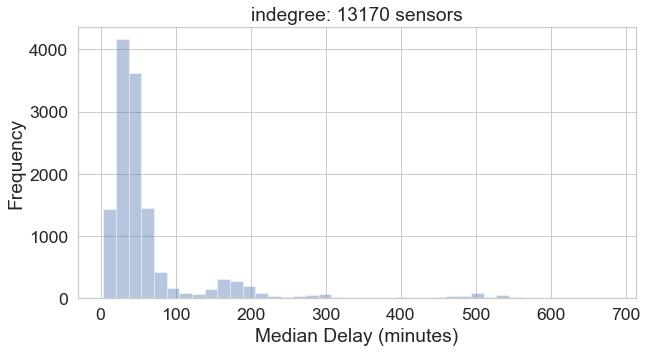

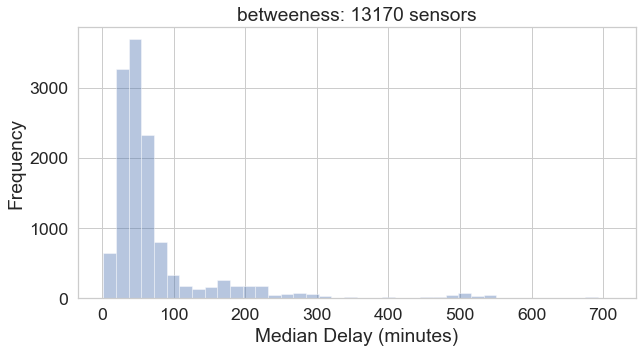

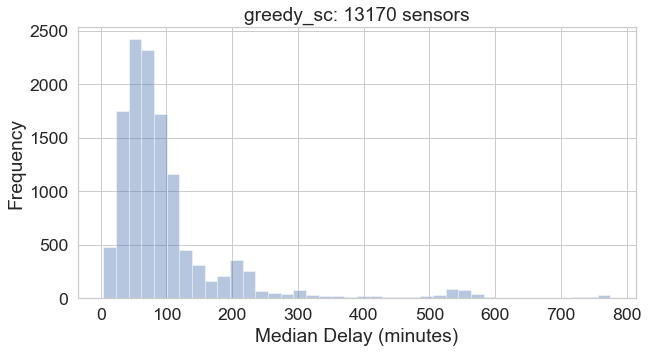

In [45]:
import math
#fig, axarr = plt.subplots(figsize=(15,5), nrows=math.ceil(len(cities)/2), ncols=1)
#plt.subplots_adjust(hspace=0.35, wspace=0.2)

ax = [len(cities)]
i = 0
for k,v in cities.items():
    #row,column = i//2, i%2
    #ax = sns.distplot(v['df1']['Median Delay (minutes)'].dropna(), ax=axarr[row][column], bins= 40, kde=False)
    plt.figure(figsize=(10,5))
    ax = sns.distplot(v['df1']['Median Delay (minutes)'].dropna(), bins= 40, kde=False)
    ax.set_title("{0}: {1} sensors".format(k, len(v['df1'])))

    print ('Mean delay (per sensor) for {}: {}'.format(k, np.nanmean(v['df1']['Mean Delay (minutes)'])))
    print ('Median delay (per sensor) for {}: {}'.format(k, np.nanmedian(v['df1']['Median Delay (minutes)'])))
    print()
    
    ax.set_ylabel('Frequency')
    i +=1
    plt.plot()
#fig.savefig('delays.png', dpi=300)

Mean delay (per packet) for indegree: 92.26317955290534
Median delay (per packet) for indegree: 42.71428571428571

Mean delay (per packet) for betweeness: 100.81908982496108
Median delay (per packet) for betweeness: 50.715029761904766

Mean delay (per packet) for greedy_sc: 125.50336435733999
Median delay (per packet) for greedy_sc: 77.91496511518994



<Figure size 432x288 with 0 Axes>

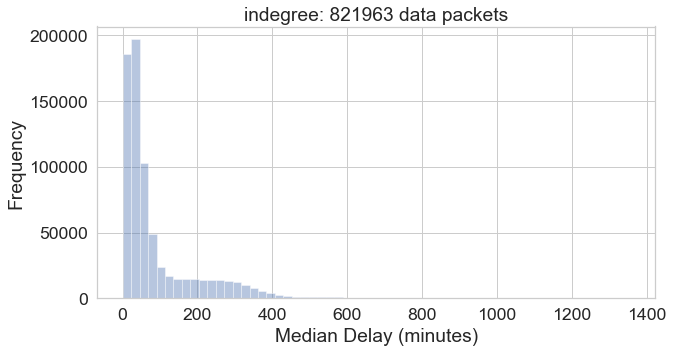

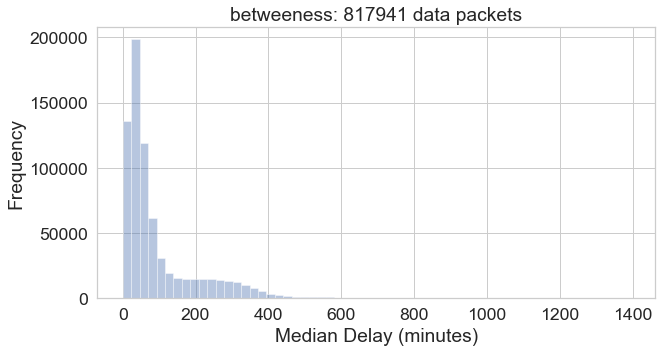

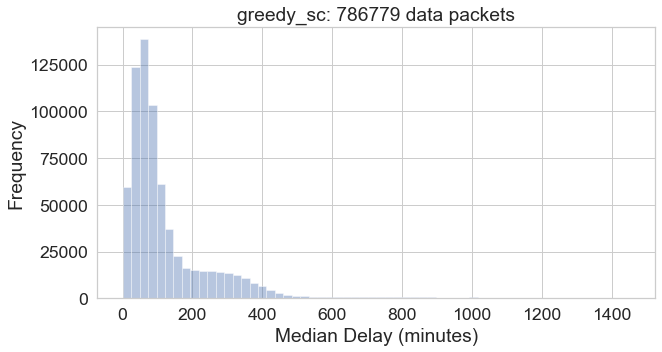

In [46]:
import math
#fig, axarr = plt.subplots(figsize=(15,5), nrows=math.ceil(len(cities)/2), ncols=1)
plt.subplots_adjust(hspace=0.35, wspace=0.2)

i = 0
for k,v in cities.items():
    plt.figure(figsize=(10,5))
    
    ax = sns.distplot(v['ons_msgs'],  kde=False, bins= 60)
    ax.set_title("{0}: {1} data packets".format(k, len(v['ons_msgs'])))
    #ax.figure.set_size_inches((10,5))
    ax.set_xlabel('Median Delay (minutes)'), ax.set_ylabel('Frequency')
    print ('Mean delay (per packet) for {}: {}'.format(k, np.nanmean(v['ons_msgs'])))
    print ('Median delay (per packet) for {}: {}'.format(k, np.nanmedian(v['ons_msgs'])))
    print()
    
    
    plt.plot()
    
    
    i +=1
#fig.savefig('delays2.png', dpi=300)

Median delivery rate (per sensor) for indegree: 0.9166666666666666
Cummulative delivery rate for indegree: 0.8840324929467628

Median delivery rate (per sensor) for betweeness: 0.9166666666666666
Cummulative delivery rate for betweeness: 0.8788311137355873

Median delivery rate (per sensor) for greedy_sc: 0.9166666666666666
Cummulative delivery rate for greedy_sc: 0.8709027566826263



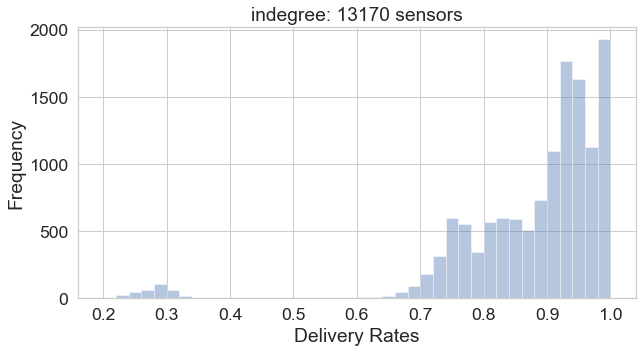

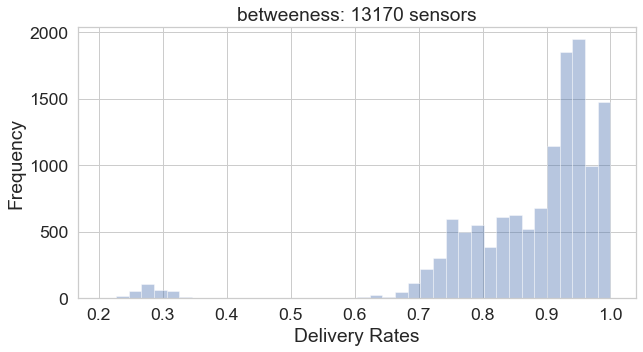

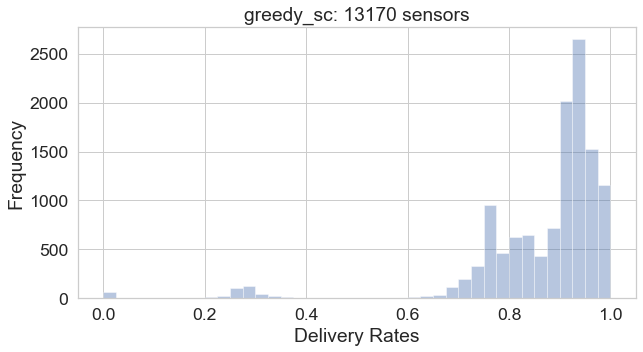

In [47]:
import math
#fig, axarr = plt.subplots(figsize=(15,5), nrows=math.ceil(len(cities)/2), ncols=1)
#plt.subplots_adjust(hspace=0.35, wspace=0.2)

ax = [len(cities)]
i = 0
for k,v in cities.items():
    plt.figure(figsize=(10,5))
    ax = sns.distplot(v['df1']['delivery_rate'].dropna(), bins= 40, kde=False)
    ax.set_title("{0}: {1} sensors".format(k, len(v['df1'])))
    
    print ('Median delivery rate (per sensor) for {}: {}'.format(k, np.nanmedian(v['df1']['delivery_rate'])))
    print ('Cummulative delivery rate for {}: {}'.format(k, v['total_delivered']/v['total_generated']))
    print()
    
    ax.set_xlabel('Delivery Rates')
    ax.set_ylabel('Frequency')
    i +=1
    plt.plot()

#fig.savefig('delays.png', dpi=300)

For indegree 

Sensor->Bus 
Mean: 80.97924256964247, Median: 30.4
Bus->Gateway 
Mean: 11.283936983262855, Median: 7.538593415156826



For betweeness 

Sensor->Bus 
Mean: 82.80365125446141, Median: 30.566666666666666
Bus->Gateway 
Mean: 18.01543857049962, Median: 14.029340540540542



For greedy_sc 

Sensor->Bus 
Mean: 85.70519323358933, Median: 31.5
Bus->Gateway 
Mean: 39.79817112375062, Median: 36.62049119861622





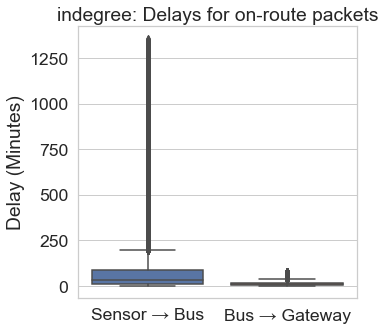

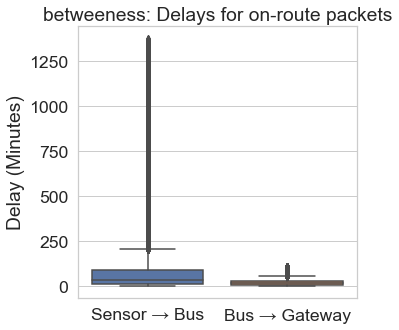

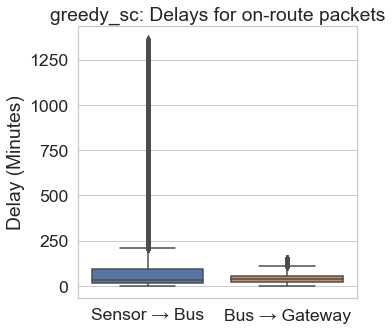

In [48]:
i = 0
for k,v in cities.items():
    plt.figure(figsize=(10,5))
    
    a = v['ons_wait_times'][~np.isnan(v['ons_wait_times'])]
    b = v['ons_route_times'][~np.isnan(v['ons_route_times'])]
    
    ax = sns.boxplot(
        x=['Sensor \u2192 Bus','Bus \u2192 Gateway'],
        y=[a, b]
    )
    ax.set_ylabel('Delay (Minutes)')
    ax.figure.set_size_inches((5,5))
    ax.set_title(k + ": Delays for on-route packets")
    ax.figure.savefig('e.png', dpi=300)

    print("For {}".format(k), "\n")
    print(
        "Sensor->Bus \nMean: {0}, Median: {1}".format(
            np.nanmean(v['ons_wait_times']), 
            np.nanmedian(v['ons_wait_times'])
        )
    )
    
    print(
        "Bus->Gateway \nMean: {0}, Median: {1}".format(
            np.nanmean(v['ons_route_times']),
            np.nanmedian(v['ons_route_times'])
        )
    )
    print('\n\n')